In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_4b'


In [2]:
class SigmoidNeuron1:
    def __init__(self):
        self.w = None
        self.b = None  
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def forward_prop(self,X):
        #print("forwar_prop",X.shape,self.w.shape,self.b,self.sigmoid(np.dot (X,self.w) + self.b).shape)
        return self.sigmoid(np.dot (X,self.w) + self.b)
    def backward_prop(self,X,Y):
        m = X.shape[0]
        #print(self.forward_prop(X).shape,Y.reshape(-1,1).shape)
        dz = self.forward_prop(X) -Y.reshape(-1,1) 
        #print("dz X",dz.shape,X.shape,type(dz))
        db = 1/m*np.sum(dz)
        dw = 1/m*np.dot(X.T,dz)
        #print("dw db",dw.shape,db)
        return dw,db
    def loss(self,y,y_predict):
        m=y.shape[0]
        y=y.reshape(-1,1)
        print(y.shape)
        #print(y_predict)
        for i,j,k in zip(y,y_predict,(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))):
            print(i,j,k)
            print(i*np.log(j))
            print(1-i,np.log(1-j),(1-i)*np.log(1-j))
        print((y*np.log(y_predict)+(1-y)*np.log(1-y_predict)))
        return -1/m*np.sum(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))
    def update(self,dw,db,learning_rate):
        
        self.w  = self.w -learning_rate* dw
        self.b  = self.b -learning_rate* db 
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse",display_loss=False):
        loss_list =[]
        if(initialise):
            self.w = np.zeros((X.shape[1],1))
            self.b = 0
            dw     = 0
            db     = 0
            best_w = 0
            best_b = 0
            best_acc =0
        for iter1 in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):    
        #for iter1 in range(epochs):
                y_predict = self.forward_prop(X)
                #print(learning_rate)
                if((iter1+1)%1000==0):
                    learning_rate =learning_rate*0.8
                    print(learning_rate)    
                dw,db = self.backward_prop(X,Y)
                self.update(dw,db,learning_rate)
                y_predict = self.forward_prop(X)
                loss_list.append(log_loss(Y,y_predict))
                y_predict =(y_predict>= 0.5).astype(int)
                accuracy = accuracy_score(y_predict,Y.reshape(-1,1))
                if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
        self.w   = best_w
        self.b   = best_b
                #print(y_predict)
        if display_loss:
            #print(loss_list)
            #print("w,b",self.w,self.b)
            plt.plot(loss_list)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    def predict(self,X):
        return self.forward_prop(X)         

In [3]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    print(folder_path)
    print (files)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        #thresh2 =
        img        = cv2.imread(file_path)
        image   =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,thresh2 = cv2.threshold(image,10,255,cv2.THRESH_BINARY_INV)
        images[image_index] = np.array(thresh2.copy()).flatten()
        #image.close()
    return images

In [4]:
LEVEL = 'level_4b'
languages = ['ta', 'hi', 'en']
import cv2
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import cv2
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-10, 10)
    return sk.transform.rotate(image_array, random_degree)



def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]


images_train = read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
   images_train.update(read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+language, key_prefix=language+"_" ))

print(len(images_train))

images_test = read_all("../input/"+ LEVEL+ "_test/" +"kaggle_"+LEVEL, key_prefix='')

Reading:
../input/level_4b_train/level_4b/background
['displayPanel_5_flip_blur_d2.jpg', 'door_17_flip_blur_d3.jpg', 'door_36_rotate_blur.jpg', 'wall_11_rotate_edgeEnhance.jpg', 'fabric_1_none_edgeEnhance_d2.jpg', 'fabric_26_flip_none.jpg', 'mountain_8_flip_blur_d2.jpg', 'mountain_23_flip_none_d2.jpg', 'door_25_none_smooth_d2.jpg', 'door_33_none_edgeEnhance_d2.jpg', 'dressingCase_3_none_none.jpg', 'door_33_none_smooth.jpg', 'tent_13_flip_smooth_d3.jpg', 'fabric_15_none_blur.jpg', 'tent_0_none_edgeEnhance.jpg', 'envelope_9_flip_sharpen_d3.jpg', 'door_9_rotate_none_d3.jpg', 'dressingCase_0_none_blur.jpg', 'door_41_rotate_none_d2.jpg', 'door_36_none_none_d2.jpg', 'wall_3_rotate_edgeEnhance_d3.jpg', 'door_40_none_smooth.jpg', 'door_15_none_blur_d3.jpg', 'fabric_4_flip_sharpen_d2.jpg', 'fabric_29_flip_none.jpg', 'fabric_2_none_sharpen.jpg', 'fabric_6_rotate_blur_d3.jpg', 'fabric_35_rotate_smooth_d2.jpg', 'tent_7_rotate_sharpen_d3.jpg', 'tent_11_rotate_none_d2.jpg', 'dressingCase_5_flip_blur


Reading:
../input/level_4b_train/level_4b/ta
['fabric_8_c49_11_rotate_smooth.jpg', 'fabric_25_c42_6_rotate_smooth.jpg', 'fabric_27_c70_1_none_blur.jpg', 'door_40_c51_13_none_edgeEnhance.jpg', 'mountain_21_c77_2_flip_blur.jpg', 'mountain_18_c59_5_flip_blur.jpg', 'fabric_8_c49_11_rotate_sharpen.jpg', 'dressingCase_8_c84_0_rotate_edgeEnhance.jpg', 'fabric_0_c69_0_rotate_smooth.jpg', 'fabric_29_c57_5_rotate_smooth.jpg', 'dressingCase_2_c11_2_flip_sharpen.jpg', 'mountain_6_c35_8_flip_blur.jpg', 'envelope_10_c5_5_flip_smooth.jpg', 'displayPanel_3_c75_3_flip_none.jpg', 'tent_16_c45_2_flip_blur.jpg', 'door_18_c82_7_rotate_smooth.jpg', 'displayPanel_6_c7_12_rotate_none.jpg', 'mountain_9_c39_14_flip_sharpen.jpg', 'fabric_20_c19_5_flip_sharpen.jpg', 'fabric_0_c69_0_flip_none.jpg', 'fabric_6_c33_0_flip_blur.jpg', 'envelope_2_c1_7_flip_edgeEnhance.jpg', 'fabric_14_c95_1_rotate_sharpen.jpg', 'mountain_13_c89_13_flip_none.jpg', 'mountain_13_c89_13_flip_smooth.jpg', 'mountain_14_c36_10_none_sharpen.j


Reading:
../input/level_4b_train/level_4b/hi
['door_41_c11_33_rotate_sharpen.jpg', 'door_27_c0_40_flip_sharpen.jpg', 'envelope_4_c5_36_flip_edgeEnhance.jpg', 'mountain_20_c1_97_flip_sharpen.jpg', 'tent_11_c5_97_none_none.jpg', 'door_30_c7_46_flip_blur.jpg', 'envelope_0_c0_47_none_blur.jpg', 'door_40_c0_32_rotate_none.jpg', 'door_11_c2_23_none_none.jpg', 'mountain_13_c9_74_flip_none.jpg', 'tent_7_c10_32_flip_edgeEnhance.jpg', 'door_41_c11_33_none_none.jpg', 'mountain_3_c5_59_rotate_edgeEnhance.jpg', 'displayPanel_2_c0_4_none_sharpen.jpg', 'fabric_31_c5_93_rotate_blur.jpg', 'mountain_14_c4_89_rotate_edgeEnhance.jpg', 'envelope_11_c10_17_rotate_smooth.jpg', 'door_1_c11_95_flip_edgeEnhance.jpg', 'dressingCase_3_c7_98_none_edgeEnhance.jpg', 'mountain_2_c9_93_rotate_edgeEnhance.jpg', 'displayPanel_2_c0_4_none_none.jpg', 'tent_8_c8_15_rotate_none.jpg', 'wall_16_c10_44_none_sharpen.jpg', 'door_26_c3_2_none_sharpen.jpg', 'fabric_19_c1_95_none_sharpen.jpg', 'tent_11_c5_97_flip_blur.jpg', 'door_


Reading:
../input/level_4b_train/level_4b/en
['fabric_29_c9_107_none_edgeEnhance.jpg', 'tent_3_c49_144_none_blur.jpg', 'envelope_17_c37_76_rotate_none.jpg', 'mountain_19_c9_136_flip_smooth.jpg', 'fabric_16_c17_94_none_edgeEnhance.jpg', 'fabric_15_c17_93_flip_edgeEnhance.jpg', 'wall_15_c4_173_rotate_edgeEnhance.jpg', 'door_5_c6_13_none_smooth.jpg', 'dressingCase_2_c26_52_none_edgeEnhance.jpg', 'door_16_c50_24_rotate_smooth.jpg', 'mountain_3_c50_120_flip_blur.jpg', 'displayPanel_5_c19_5_rotate_edgeEnhance.jpg', 'envelope_11_c38_70_rotate_none.jpg', 'fabric_33_c49_111_flip_blur.jpg', 'door_3_c24_11_rotate_edgeEnhance.jpg', 'tent_2_c0_143_none_blur.jpg', 'wall_3_c48_161_rotate_none.jpg', 'door_18_c25_26_flip_edgeEnhance.jpg', 'tent_9_c22_150_flip_sharpen.jpg', 'door_19_c27_27_rotate_smooth.jpg', 'wall_0_c48_158_none_none.jpg', 'door_11_c22_19_rotate_blur.jpg', 'mountain_11_c31_128_flip_edgeEnhance.jpg', 'door_28_c19_36_none_smooth.jpg', 'mountain_10_c28_127_flip_sharpen.jpg', 'tent_4_c42_


9000
Reading:
../input/level_4b_test/kaggle_level_4b
['2562.jpg', '2864.jpg', '1441.jpg', '2051.jpg', '1111.jpg', '2184.jpg', '1436.jpg', '2546.jpg', '2166.jpg', '145.jpg', '2684.jpg', '1912.jpg', '2981.jpg', '1313.jpg', '672.jpg', '1765.jpg', '2292.jpg', '2713.jpg', '388.jpg', '1256.jpg', '406.jpg', '1152.jpg', '2637.jpg', '408.jpg', '774.jpg', '1593.jpg', '670.jpg', '2639.jpg', '2377.jpg', '491.jpg', '1517.jpg', '716.jpg', '531.jpg', '1732.jpg', '668.jpg', '1584.jpg', '2066.jpg', '1901.jpg', '34.jpg', '2894.jpg', '1651.jpg', '2734.jpg', '482.jpg', '2895.jpg', '941.jpg', '2820.jpg', '2935.jpg', '2239.jpg', '1090.jpg', '688.jpg', '1070.jpg', '2674.jpg', '2430.jpg', '1163.jpg', '2832.jpg', '2501.jpg', '2732.jpg', '696.jpg', '1580.jpg', '1604.jpg', '535.jpg', '2372.jpg', '90.jpg', '1760.jpg', '1826.jpg', '2721.jpg', '529.jpg', '860.jpg', '1231.jpg', '835.jpg', '1644.jpg', '1546.jpg', '569.jpg', '1735.jpg', '2675.jpg', '261.jpg', '2946.jpg', '2056.jpg', '2603.jpg', '578.jpg', '48.jpg', '

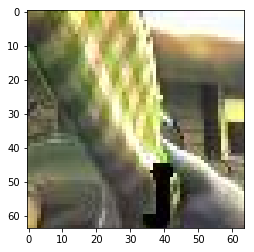

In [5]:
import glob
import cv2

img = [cv2.imread(file) for file in glob.glob("../input/level_4b_train/level_4b/en/*")]
plt.imshow(img[0])

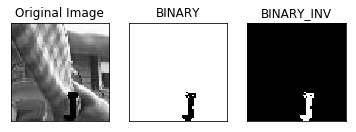

In [6]:

#retval,mask_img = cv2.threshold("../input/level_4b_train/level_4b/ta/idx1132_fabric_19_d3.jpg", 255, 255, cv2.THRESH_BINARY)
img1          =  cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(img1,10,255,cv2.THRESH_BINARY)



ret,thresh2 = cv2.threshold(img1,10,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img1,0,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img1,0,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img1,0,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img1, thresh1, thresh2, thresh3, thresh4, thresh5]

#plt.imshow(thresh1,'gray')
#plt.imshow(thresh2,'gray')
#plt.imshow(thresh3,'gray')
#plt.imshow(thresh4,'gray')
#plt.imshow(thresh5,'gray')
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [7]:
list(images_test.keys())[:5]

['2562', '2864', '1441', '2051', '1111']

In [8]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
#print("X_train[0]",X_train[0])
X_train = np.array(X_train)/255
print(np.sort(X_train))
#print(X_train)
#print(horizontal_flip(X_train))
X_train = np.vstack((X_train,horizontal_flip(X_train),random_rotation(X_train)))
Y_train = np.array(Y_train)
Y_train = np.hstack((Y_train,Y_train,Y_train))
X_test = np.array(X_test)/255
#print(Y_train)
print(X_train.shape, Y_train.shape)
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
(27000, 4096) (27000,)
(3000, 4096)


In [9]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
print(np.sort(X_scaled_train))

[[-0.29032124 -0.28994758 -0.28912748 ... -0.19398472 -0.19181914
  -0.18861729]
 [-0.29032124 -0.28994758 -0.28912748 ...  5.74413477  5.8604915
   5.87696694]
 [-0.29032124 -0.28994758 -0.28912748 ...  4.80793848  4.89051758
   5.62847439]
 ...
 [-0.29032124 -0.28994758 -0.28912748 ...  4.68507105  4.76597716
   5.05609938]
 [-0.29032124 -0.28994758 -0.28912748 ...  5.29626051  5.41412579
   5.59686032]
 [-0.29032124 -0.28994758 -0.28912748 ...  5.44188914  5.75137923
   5.75477095]]


In [10]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=1000, learning_rate=0.005, loss_fn="mse", display_loss=True)

In [11]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=4000, learning_rate=0.012, loss_fn="ce", display_loss=True)

In [12]:
#sn_mse = SigmoidNeuron1()
#sn_mse.fit(X_scaled_train, Y_train, epochs=8000, learning_rate=0.015, loss_fn="ce", display_loss=True)

In [13]:


from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=2,shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X_scaled_train) # returns the number of splitting iterations in the cross-validator
#print(kf) 


def cross_validation(learning_rate,epochs):
    acc =[]
    for train_index, test_index in kf.split(X_scaled_train):
        #print(train_index,test_index)
        sn_ce = SigmoidNeuron1()
        sn_ce.fit(X_scaled_train[train_index], Y_train[train_index], epochs=epochs, learning_rate=learning_rate, loss_fn="ce", display_loss=True)
        Y_pred_binarised_train = (sn_ce.predict(X_scaled_train[test_index])>= 0.5).astype("int").ravel()
        accuracy_test = accuracy_score(Y_pred_binarised_train, Y_train[test_index])
        acc.append(accuracy_test)
    print(acc)
    accuracy =sum(acc)/len(acc)
    return accuracy



In [14]:
#epochs_list =[8000,10000]
#lr_rate_list =[0.015,0.025]
#acc_dic ={}

#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [15]:
#epochs_list =[5000]
#lr_rate_list =[0.035]
#acc_dic ={}

#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [16]:
#sn_ce = SigmoidNeuron1()
#best_epoch   = 7000
#best_lr_rate = 0.035
#sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
#Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()


In [17]:

sn_ce = SigmoidNeuron1()
best_epoch   = 7000
best_lr_rate = 0.09
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()

0.072
0.0576
0.04608
0.036864
0.029491200000000002
0.023592960000000003


In [18]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [19]:
#print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  0.9276666666666666
--------------------------------------------------


## Sample Submission

In [20]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)

In [21]:
!pwd


/kaggle/working
